In [67]:
import numpy as np
import pandas as pd
import re
from collections import Counter
from scipy import special
import matplotlib.pyplot as plt
%matplotlib inline
import random
import cProfile

In [68]:
data = pd.read_csv('../../data/sherlock_current_wtext.csv')

In [69]:
temp = data[data.PublishDate != data.CompleteDate]
temp.head()

,Additional_Tags,Archive_Warnings,Author,Bookmarks,Category,Chapters,Characters,Comments,CompleteDate,Fandoms,...,Kudos,Language,Notes,PublishDate,Rating,Relationship,Summary,Text,Title,Words
0,"zombie apocalypse AU, a bit like The Walking ...",Creator Chose Not To Use Archive Warnings,thewallflower07,1,NaN,1/1,"Sherlock Holmes, John Watson, Molly Hooper, G...",2,NaN,Sherlock (TV),...,23,English,"The dialogue and speech thing is intentional, ...",2015-11-07,Teen And Up Audiences,"Sherlock Holmes& John Watson, Molly Hooper/Gr...",What the end of the world means and how you su...,AAAThe quickest way of ending a war is to lose...,The End of the World,2468
1,"Alternate Universe, Alternate Universe - Soul...",Creator Chose Not To Use Archive Warnings,Iolre,117,M/M,16/16,"Mycroft Holmes, Greg Lestrade, Sherlock Holme...",185,2015-11-07,Sherlock (TV)Sherlock Holmes & Related Fandoms,...,534,English,This is a gift for the lovely rykoe-little-bla...,2014-01-14,Explicit,"Mycroft Holmes/Greg Lestrade, background Sher...",Mycroft is the man who thinks he has everythin...,"Mycroft Holmes tapped his long, elegant finger...",A Missing Piece,43487
2,"Alternate Universe, Alternate Universe - Soul...",Creator Chose Not To Use Archive Warnings,Iolre,117,M/M,16/16,"Mycroft Holmes, Greg Lestrade, Sherlock Holme...",185,2015-11-07,Sherlock (TV)Sherlock Holmes & Related Fandoms,...,534,English,NaN,2014-01-14,Explicit,"Mycroft Holmes/Greg Lestrade, background Sher...",Mycroft is the man who thinks he has everythin...,Mycroft watched the DI enter the rather noisy ...,A Missing Piece,43487
3,"Alternate Universe, Alternate Universe - Soul...",Creator Chose Not To Use Archive Warnings,Iolre,117,M/M,16/16,"Mycroft Holmes, Greg Lestrade, Sherlock Holme...",185,2015-11-07,Sherlock (TV)Sherlock Holmes & Related Fandoms,...,534,English,NaN,2014-01-14,Explicit,"Mycroft Holmes/Greg Lestrade, background Sher...",Mycroft is the man who thinks he has everythin...,There certainly weren’t butterflies in Mycroft...,A Missing Piece,43487
4,"Alternate Universe, Alternate Universe - Soul...",Creator Chose Not To Use Archive Warnings,Iolre,117,M/M,16/16,"Mycroft Holmes, Greg Lestrade, Sherlock Holme...",185,2015-11-07,Sherlock (TV)Sherlock Holmes & Related Fandoms,...,534,English,NaN,2014-01-14,Explicit,"Mycroft Holmes/Greg Lestrade, background Sher...",Mycroft is the man who thinks he has everythin...,"Mycroft sprawled on the sofa, a bottle of wine...",A Missing Piece,43487


In [71]:
len(temp)/float(len(data))

0.9289126639903378

In [4]:
def create_df_time(df, time):
    return df[df.PublishDate.str[:7] == time]

In [36]:
def calculate_overall_author_ent():
    author_ent_all = []
    author_count = []
    for month in timelist:
        df = create_df_time(data, month)
        df = df.astype(str)
        df = df.groupby(['Additional_Tags', 'Archive_Warnings', 'Author', 'Bookmarks',\
                   'Category', 'Chapters', 'Characters', 'Comments', 'CompleteDate',\
                   'Fandoms', 'Hits', 'Kudos', 'Language', 'PublishDate',\
                     'Rating', 'Relationship', 'Summary', 'Title', 'Words'])['Text'].apply(','.join).reset_index()
        authors = df['Author'].tolist()
        c = Counter(authors)
        author_freq = {name:c[name] for name in authors}
        author_dist = [float(v)/sum(author_freq.values()) for v in author_freq.values()]
        author_ent = sum([-x*np.log(x) for x in author_dist])
        author_ent_all.append(author_ent)
        author_count.append(len(author_freq))
    return author_ent_all, author_count


In [37]:
timelist = data.PublishDate.drop_duplicates().tolist()
timelist = [str(i)[:7] for i in timelist]
timelist = sorted(list(set(timelist)))

In [38]:
ent, count = calculate_overall_author_ent()

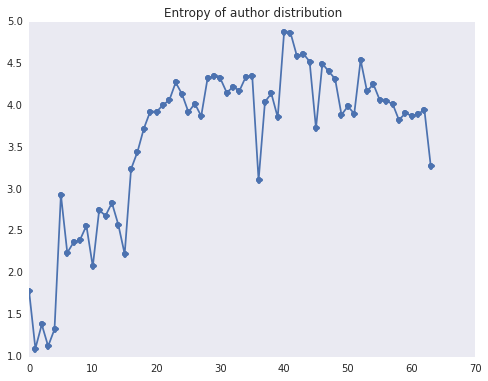

In [66]:
y = ent
x = range(len(y))

fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(x, y, marker='o')
ax.set_title('Entropy of author distribution')

plt.grid()
plt.show()
plt.savefig('/Users/jingy/Desktop/author_entropy.png', format = 'png')

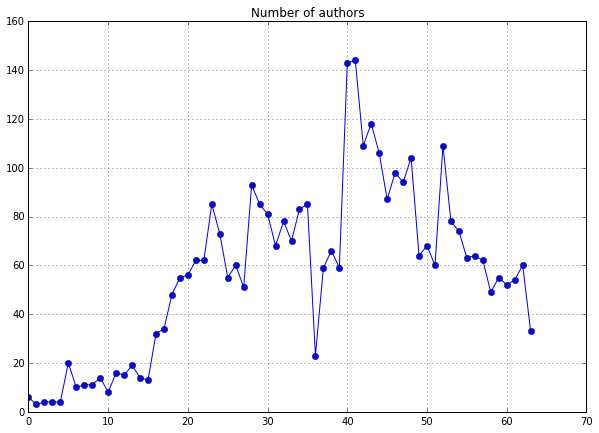

In [50]:
y = count
x = range(len(y))

fig, ax = plt.subplots(figsize = (10, 7))

ax.plot(x, y, marker='o')
ax.set_title('Number of authors')
# ax.set_yscale('log')
# ax.set_ylim([0.180, 0.225])
plt.grid()
plt.show()

In [ ]:
import seaborn as sns

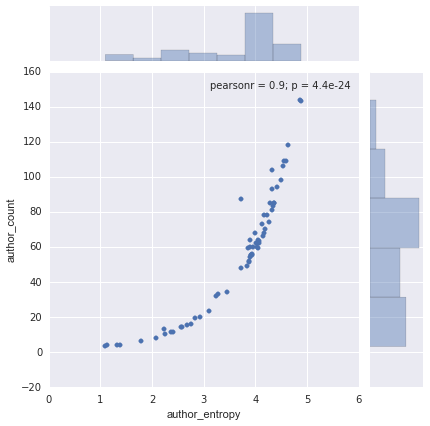

In [61]:
df_temp = pd.DataFrame({'author_entropy': ent, 'author_count': count})
sns.jointplot('author_entropy', 'author_count', data = df_temp)